2. Simple Imputation

(vi). Random imputation

(vii). Missing indicator

(viii). automatically select value for imputation(grid search)



Random imputation

~ FOR Numerical data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
df1 = pd.read_csv('DATA/Housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df = pd.read_csv('DATA/train.csv',usecols =['Age','Fare','Survived'])

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
df.isnull().mean() *100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [38]:
X = df.drop(columns =['Survived'])
Y = df['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 2)

In [39]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [40]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [41]:
#imputing random variable in the row which is missing
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\2322075209.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

In [42]:

X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([ 0.83, 39.  , 24.  ,  5.  ,  6.  , 33.  , 22.  ,  8.  , 24.  ,
       52.  , 36.  , 35.  , 31.  , 19.  ,  1.  , 26.  , 59.  , 39.  ,
       18.  , 32.  , 17.  , 40.  , 31.  , 47.  , 37.  , 25.  , 19.  ,
       33.  , 42.  , 34.  , 16.  , 38.  , 40.  , 28.  , 24.  , 57.  ,
       24.  , 39.  , 30.  , 45.  , 23.  ,  2.  , 25.  , 30.  , 24.  ,
       40.  , 16.  , 60.  , 26.  , 33.  , 30.  ,  8.  , 47.  , 22.  ,
       28.  , 26.  , 31.  , 16.  , 30.  , 38.  , 33.  , 22.  , 45.  ,
       29.  , 61.  , 22.  , 27.  , 34.  , 52.  , 34.  , 27.  , 23.  ,
       22.  , 47.  , 60.  , 40.  , 40.  , 29.  , 26.  , 28.  , 48.  ,
       45.  , 34.  , 35.  , 16.  , 19.  , 21.  ,  1.  , 65.  , 34.5 ,
       30.  , 30.  , 39.  , 33.  , 19.  , 35.  , 28.  , 20.  , 36.  ,
       21.  , 17.  , 35.  ,  9.  , 44.  ,  3.  , 56.  , 24.  , 31.  ,
       25.  , 42.  ,  4.  , 30.  , 15.  , 29.  , 28.  , 33.  , 16.  ,
       32.  , 23.  , 48.  , 24.  , 45.5 , 50.  , 27.  , 21.  , 29.  ,
       25.  , 37.  ,

In [43]:
X_train['Age'].isnull().sum()


148

In [44]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,26.0
493,71.0,49.5042,71.0
527,NaN,221.7792,31.0


C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age

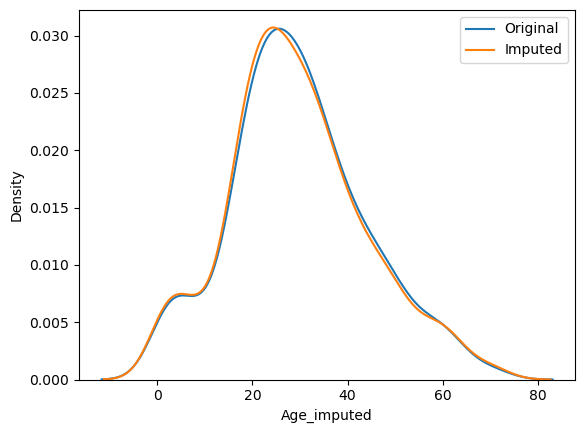

In [45]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [46]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  207.77696066763858


In [47]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,68.227434
Age,71.512440,204.349513,204.349513
Age_imputed,68.227434,204.349513,207.776961


<Axes: >

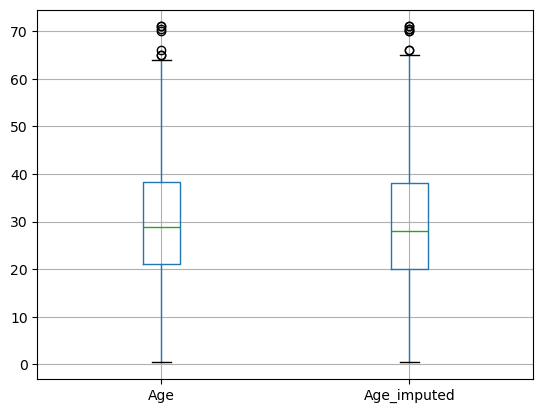

In [48]:
X_train[['Age', 'Age_imputed']].boxplot()


In [51]:
observation = X.sample(1).iloc[0]  # Get one random row as a Series
sampled_value = X['Age'].dropna().sample(1, random_state=int(observation['Fare']))

FOR CATEGORICAL DATA


In [52]:
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [55]:

X = df1
y = df1['SalePrice']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [57]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [58]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
495,NaN,NaN,34900,NaN,NaN
967,NaN,TA,135000,TA,NaN
938,NaN,TA,239799,TA,NaN
599,TA,TA,151000,TA,TA
255,TA,TA,230000,TA,TA


In [59]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual']

In [60]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [61]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.543210
Fa,0.040917,0.053872
Po,0.027823,0.034792
Ex,0.024550,0.032548


C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

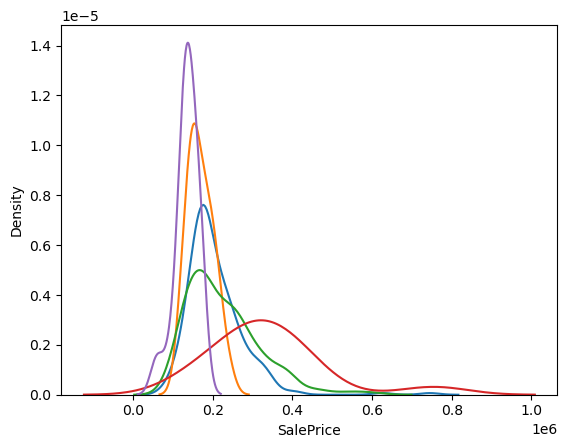

In [62]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\BIT\AppData\Local\Temp\ipykernel_16488\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

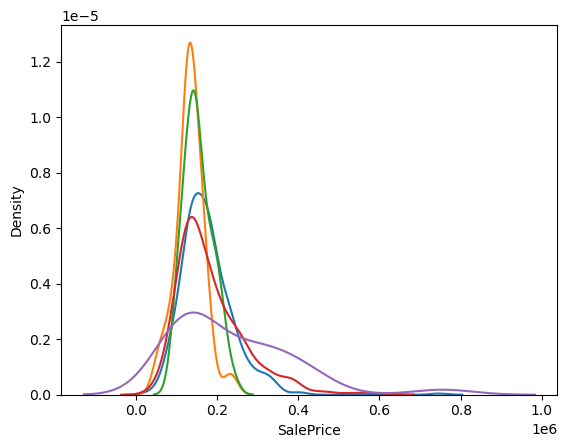

In [63]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()